In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.datasets import make_blobs
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage, cophenet
import seaborn as sns
from scipy.spatial import distance
markers = ['o', 's', 'D', '^', 'v', 'p', '*', 'H', 'x', '+', '<', '>', '1', '2', '3', '4']
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']


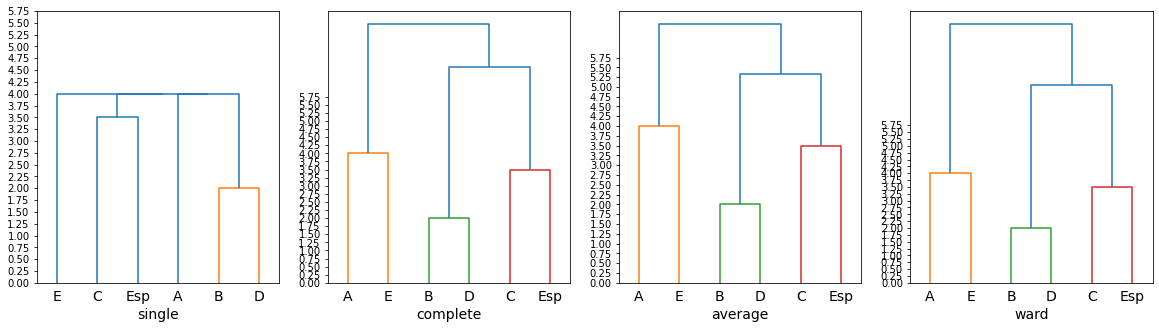

In [2]:
metric = 'minkowski'
p = 0.5
data = [[3.0,1.0,"A"],
        [2.0,2.0,"B"],
        [1.0,3.0,"C"],
        [2.0,4.0,"D"],
        [3.0,5.0,"E"],
        [4.5,3.0,"Esp"]]
        
df = pd.DataFrame(data, columns=['x', 'y', 'nom']) 
fig, axs = plt.subplots(1, 4, figsize=(20, 5))
ms = ['single', 'complete', 'average', 'ward']
dms = []
for m, ax in zip(ms, axs) :
    dm = pdist(df[["x", "y"]], metric=metric, p=p) #single, complete, average, and ward
    dms.append(dm)

    Z = linkage(dm, method=m)#single, complete, average, and ward
    d = dendrogram(Z, labels=list(df["nom"]), show_leaf_counts=True, leaf_font_size=14, ax=ax)
    ax.set_xlabel(m, fontsize=14)
    ax.set_yticks(np.arange(0, 6, 0.25))

plt.show()

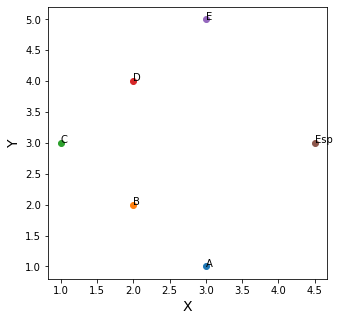

In [3]:

fig, ax = plt.subplots(figsize=(5, 5))
ax.set_xlabel('X', fontsize=14)
ax.set_ylabel('Y', fontsize=14)
for index, row in df.iterrows():
    ax.scatter(row["x"], row["y"])#, marker=markers[df["Grupo"]%len(markers)], color=colors[df["Grupo"]%len(colors)]
    ax.annotate(str(row["nom"]), (row["x"], row["y"]))
plt.show()

<AxesSubplot:>

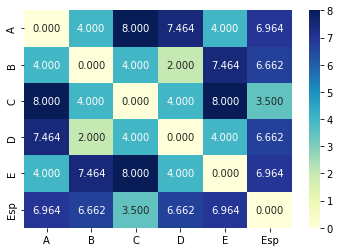

In [4]:

dm = pdist(df[["x", "y"]], metric=metric, p=p)

dist_square = distance.squareform(dm)
sns.heatmap(dist_square, 
            annot=True,  
            fmt='.3f', 
            cmap='YlGnBu', 
            yticklabels=list(df["nom"]),
            xticklabels=list(df["nom"]))

In [5]:
#usar en conjunto con silhouette score 

cpc, cp = cophenet(linkage(dm, method='single'), dm)
print('CPC Single linkage: {:.3f}'.format(cpc))

cpc, cp = cophenet(linkage(dm, method='complete'), dm)
print('CPC Complete linkage: {:.3f}'.format(cpc))

cpc, cp = cophenet(linkage(dm, method='average'), dm)
print('CPC Average linkage: {:.3f}'.format(cpc))

cpc, cp = cophenet(linkage(dm, method='ward'), dm)
print('CPC Ward\'s linkage: {:.3f}'.format(cpc))

CPC Single linkage: 0.567
CPC Complete linkage: 0.714
CPC Average linkage: 0.720
CPC Ward's linkage: 0.715
